# その他便利ライブラリ・モジュール等

>`index`
> + [28 OpenCVによる画像の読み込みと色空間の変換，表示](#28-OpenCVによる画像の読み込みと色空間の変換，表示)
> + [29 globの使い方・応用まで完全解説](#29-globの使い方・応用まで完全解説)
> + [30 tqdmを使ってforループでプログレスバーを表示する](#30-tqdmを使ってforループでプログレスバーを表示する)
> + [31 安全にPath操作をする](#31-安全にPath操作をする)
> + [32 multiprocessingでの並列処理](#32-multiprocessingでの並列処理)
> + [33 Pythonスクリプトを作ってJupyterから呼び出す](#33-Pythonスクリプトを作ってJupyterから呼び出す)

> `Cf.`
> + [データサイエンスのためのPython入門28〜OpenCVによる画像の読み込みと色空間の変換，表示〜](https://datawokagaku.com/opencv/)
> + [データサイエンスのためのPython入門29〜globの使い方・応用まで完全解説〜](https://datawokagaku.com/glob/)
> + [データサイエンスのためのPython入門30〜tqdmを使ってforループでプログレスバーを表示する〜](https://datawokagaku.com/tqdm/)
> + [データサイエンスのためのPython入門31〜osモジュールとpathlibモジュールを使って安全にPath操作をする〜](https://datawokagaku.com/os_module/)
> + [データサイエンスのためのPython入門32〜これだけ知っておけばいいmultiprocessingでの並列処理〜](https://datawokagaku.com/multiprocessing/)
> + [データサイエンスのためのPython入門33(最終回)〜Pythonスクリプトを作ってJupyterから呼び出す〜](https://datawokagaku.com/python_script/)


## 28 OpenCVによる画像の読み込みと色空間の変換，表示
    
>     データサイエンティストが扱うデータは，今まで扱っていたような(タイタニックデータのような)表形式のデータだけではありません．
>     PNGファイルのような 画像データ や mp3のような 音声ファイル や mp4のような 動画， DICOMデータのような 医用画像データ など，
>     文字通り「データ」と名前がつくもの’全て’です．
>
>     特に画像データは， 昨今の深層学習によるブレークスルーの中心的なモダリティであり， 
>     近年多くの研究者が他分野から画像処理・画像認識に流れており，目まぐるしいスピードで研究が進んでいる分野でもあります．


> `cf.`　もっと詳しく学びたい人向け（英語）
> + [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
> + [Image Processing in OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html#py-table-of-content-imgproc)

### | OpenCV
>     OpenCVは「コンピュータ・ビジョン」のアルゴリズムを簡単に使えるライブラリで，画像を扱う際には必須のライブラリです．
>     例えば画像の輪郭だけ書いてくれたり色空間(白黒とか)を変更したり，いろんなことがめちゃくちゃ簡単にできます．
>     もともとはC++で書かれたライブラリですが，Pythonラッパーもかなりアクティブに開発されており，Pythonで問題なく使えます．
>
>     (余談) Python用画像処理系ライブラリには他に， Python Imaging Library (PIL)と呼ばれるものがあります.
>           OpenCVの方が深層学習系のライブラリ(TensorFlow, PyTorchやCaffeなど)との相性もよく，
>           最近ではPILよりOpenCVの方が使われていると思います．

### | OpenCVインストール&インポート

```(番外編)```
### Dockerでライブラリインポート
> 基本的には ```$pip install opencv-python```でインストール可能ですが，
> 場合によっては事前に関連パッケージのインストールが必要です．せっかくなのでこれを機にDocker環境の更新手順を紹介したいと思います．

> #### 1.Dockerコンテナに入ってopencvをインストール
> ```
> # Dockerコンテナ名確認
> 
> $ docker ps
> $ docker exec -it my-lab bash
> root@ec5e9afb20f6:/#
> ```
> コンテナに入れました。

> #### 2. OpenCVをインストール
> ```
> $pip install opencv-python 
> ```
>
> ```
> $ apt-get update
> $ apt-get install -y libsm6 libxext6 libxrender-dev libglib2.0-0
> ```

In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [2]:
!pip install opencv-python

     |████████████████████████████████| 40.3 MB 179 kB/s eta 0:00:013
You should consider upgrading via the '/Users/t/.pyenv/versions/3.8.5/bin/python3.8 -m pip install --upgrade pip' command.


In [3]:
!/Users/t/.pyenv/versions/3.8.5/bin/python3.8 -m pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 53 kB/s eta 0:00:013
  Attempting uninstall: pip
    Found existing installation: pip 21.0
    Uninstalling pip-21.0:
      Successfully uninstalled pip-21.0


In [4]:
import cv2

### | OpenCVを使って画像を表示
> Dockerからアクセスできるところ(かめさんの環境では~/Desktop/ds_pythonフォルダ)に配置
>（第一回でdocker runした際の-vオプションです．）
>
> <img src='https://datawokagaku.com/wp-content/uploads/2020/02/lenna.png' width=12%>

> `memo`
>
>      この写真，実はコンピュータ・ビジョン界隈では非常に有名な写真で，様々な論文で，「サンプル画像」として使われています． 
>      もともとはPLAYBOY誌のグラビア(ヌード)写真から切り取った写真で，1970年代前半に最初に使われたらしく，当初は「けしからん」と論争を巻き起こしたとか...
>      今ではすっかりおなじみの画像になりました．
>      ちなみに「Lena Forsen」が本名ですが，正しい発音に近いlennaが一般的に使われてます．(どっちでもいいわっ)

#### - cv2.imread()
>     画像を NumPy-Array で読み込む imread(image raad)

In [7]:
import cv2
lenna = cv2.imread("input/lenna.png")

In [10]:
print("Dimmension is {}. \nType is {}.".format(lenna.shape, type(lenna)))

Dimmension is (220, 220, 3). 
Type is <class 'numpy.ndarray'>.


>     これは画像の(高さ, 横幅, channel数)
>     高さ と 横幅 は当然ピクセル数で， channelというのは画像の色を表現するのに使うもので， Red, Green, Blueの3channelであり，「RGB」というchannelでデータが保存されるのが一般的です．
>     （後述しますが，OpenCVはデフォルトで 「BGR」 です．気をつけてください．）

> <img src='https://datawokagaku.com/wp-content/uploads/2020/02/rgb_overview.png' width=55%>
>
>     もう少し詳しく説明すると，
>     色を表現するにはいくつか方法があり， その一つに「赤・緑・青の３色の光を足し合わせる(加法混色)」という方法があります．
>     各ピクセルの値はその光(Rなら赤)の強さを表しており，それを輝度値(Intensity)と呼びます．
>     OpenCVではデフォルトで0~255の256(8bit)階調で表します．通常，画像は8bitで保存されます．

#### - plt.imshow()
>    画像を表示する

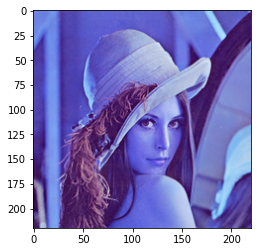

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(lenna)

>    ・・・が，なんか青いですよね？
> 
>     実はこれ，OpenCVは画像を読み込む際に色空間をBGRで読んでいて，matplotlibではRGBで表示しているからです．
>     つまり， 青と赤が逆になってしまっているってこと.

> `⚠️`
>
>      現代一般的に使われるのはRGBなんですが， OpenCVはBGRで読み込みます．
>      これには歴史的背景があるんですが，今日は触れません．興味がある方はググってみてください．
>      とにかくこれがややこしい上に予期せぬバグを起こしやすいです．初学者は特に注意です．
>      lennaの画像は幸いRとBが逆になると明らかに見た目が違うんで気づきますけど，そうでない画像も多いです．
>      すると気づかずRとBを逆に捉えていて，「あるコードではRGB，別のコードではBGRで処理してた」なんてこともありえます．

#### - cv2.cvtColor()
>    BGRからRGBに変換する(cvtはconvertの略です)

>    第一引数にndarrayを，第二引数に「なにからなにへの変換」なのかを示すcodeを指定(cv2.COLOR_に続く変数がそれです)
>    Jupyterではcv2.COLORと打ってTabキーを押すと補完候補をみることができます．
>
> ```Python
> cv2.colorJ
> ```

In [ ]:
cv2.color

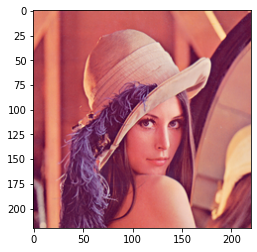

In [15]:
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
plt.imshow(lenna_rgb)

## 29 globの使い方・応用まで完全解説

> `cf.`
> + [グロブ - wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B0%E3%83%AD%E3%83%96)

### | globを使って対象ファイルパスをリスト化
> glob関数を使って，パターンにマッチしたファイルパスのリストを作る事ができます．(大量のファイルを扱う際によく使います．)

In [1]:
from glob import glob

In [3]:
glob("input/gaussian_filtered_images/Mild/*")

['input/gaussian_filtered_images/Mild/2d7666b8884f.png',
 'input/gaussian_filtered_images/Mild/50840c36f0b4.png',
 'input/gaussian_filtered_images/Mild/30cab14951ac.png',
 'input/gaussian_filtered_images/Mild/a8582e346df0.png',
 'input/gaussian_filtered_images/Mild/cab3dfa7962d.png',
 'input/gaussian_filtered_images/Mild/35d6c4c50072.png',
 'input/gaussian_filtered_images/Mild/67f5d89da548.png',
 'input/gaussian_filtered_images/Mild/6b07971c3bf6.png',
 'input/gaussian_filtered_images/Mild/7116128c65ab.png',
 'input/gaussian_filtered_images/Mild/e38f3a65b02b.png',
 'input/gaussian_filtered_images/Mild/d85588ff2ebd.png',
 'input/gaussian_filtered_images/Mild/a19ecd0a706e.png',
 'input/gaussian_filtered_images/Mild/49c5e7f6b8d2.png',
 'input/gaussian_filtered_images/Mild/2f2e1949ad56.png',
 'input/gaussian_filtered_images/Mild/35aa7f5c2ec0.png',
 'input/gaussian_filtered_images/Mild/55eac26bd383.png',
 'input/gaussian_filtered_images/Mild/af133a85ea0c.png',
 'input/gaussian_filtered_image

In [18]:
import numpy as np
allpng_list = glob("input/gaussian_filtered_images/*/*.png")

# gaussian_filtered_images配下のフォルダ名取得（内包表記）
folder_list = [p.split("/")[2]for p in allpng_list]
print("フォルダ名：", np.unique(folder_list))

# .で区切った最後尾取得（拡張子取得）
extension_list = [p.split(".")[-1]for p in allpng_list]
print("拡張子 :", np.unique(extension_list))

フォルダ名： ['Mild' 'Moderate']
拡張子 : ['png']


In [27]:
#データフレーム化
import pandas as pd

df = pd.DataFrame({"path":allpng_list, "type":folder_list, "extension":extension_list})
df.head(3)

,path,type,extension
0,input/gaussian_filtered_images/Mild/2d7666b888...,Mild,png
1,input/gaussian_filtered_images/Mild/50840c36f0...,Mild,png
2,input/gaussian_filtered_images/Mild/30cab14951...,Mild,png


```Python
import numpy as np
import pandas as pd

allpngs = glob("input/gaussian_filtered_images/*/*.png")
types = [p.split("/")[2]for p in allpngs]
extensions = [p.split(".")[-1]for p in allpngs]
df = pd.DataFrame({"path":allpngs, "type":types, "extension":extensions})
```
> `memo`
>
> 大量データのデータフレーム化処理の一連は`データサイエンスではめちゃくちゃ頻出`

In [28]:
df["type"].value_counts()

Moderate    999
Mild        370
Name: type, dtype: int64

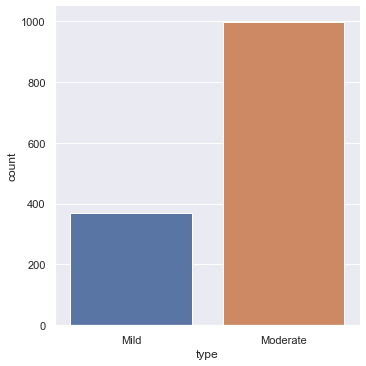

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plt.figure(figsize=(1, 1))
sns.catplot(x="type", data=df, kind="count")

## 30 tqdmを使ってforループでプログレスバーを表示する
> 大量のデータを処理する際にプログレスバーを表示するtqdmというモジュールについて解説

> `cf.`
> + [tqdm - github](https://github.com/tqdm/tqdm)

### | tqdmをインストール＆インポート
> globと違って`import tqdm`でインポートし`tqdm.tqdm`と使う人はあまり見ません

In [39]:
from tqdm import tqdm

### | tqdmの基本的な使い方

In [41]:
sum = 0
for i in range(0, 10000000):
    sum += 1
print(sum)

10000000


In [42]:
sum = 0
for i in tqdm(range(0, 10000000)):
    sum += 1
print(sum)

100%|██████████| 10000000/10000000 [00:03<00:00, 3101214.79it/s]

10000000


### | total引数を使って，データ数表示

In [62]:
import numpy as np
import pandas as pd 
from glob import glob

allimg_list = glob("input/gaussian_filtered_images/*/*.png")
type_list = [p.split("/")[2]for p in allimg_list]
extension_list = [p.split(".")[-1]for p in allimg_list]
# print(np.unique([type_list, extension_list]))
df = pd.DataFrame({"path":allimg_list, "type":type_list, "extension":extension_list})
df.head(3)

,path,type,extension
0,input/gaussian_filtered_images/Mild/2d7666b888...,Mild,png
1,input/gaussian_filtered_images/Mild/50840c36f0...,Mild,png
2,input/gaussian_filtered_images/Mild/30cab14951...,Mild,png


In [61]:
# データフレームをfor処理の際にtqdmを挟む
for idx, row in tqdm(df.iterrows(), total=len(df)):
    pass

100%|██████████| 1369/1369 [00:00<00:00, 12631.14it/s]


### | 頻出例：データIO処理でよく使う
>     このtqdmは特に，データを読み込んで処理して保存するようなIO処理でよく使います．
>     pngデータをnpyデータで保存する処理は深層学習でよく使います．
>     (多くの深層学習のフレームワークは学習データとしてnpyデータを使うから)

In [68]:
import cv2

In [74]:
#NumPy Arrayを保存先パス
sava_path = "output/gaussian_filtered_nparray/"

for p in glob("input/gaussian_filtered_images/*/*.png"):
   #  pngファイルをOpenCVでロード
    im = cv2.imread(p)
    # 画像のファイル名をそのまま流用
    file_name = p.split("/")[-1].split(".png")[0]
    save_path = sava_path + file_name
    # 
    np.save(save_path, im)

## 31 安全にPath操作をする
>     osモジュールとpathlibモジュールを使って，安全にPath操作をする方法
>     ファイルパスはOSによって異なりますし，スラッシュをつけ忘れてたりしてバグの元なので文字列操作だけでは不安です．
>     文字列ではなくてosモジュールを使うことで，安全にpathを操作できます

> `⚠️`
>
>     今回の内容は普段解析で常に使うものでもないので，
>     多くの人は都度ネットで確認しながら書くようなコードだと思います．
>     なので覚えようとはせず，必要な時にググればいいくらいに読んでください

### | osモジュールとpathlibモジュールをインポートする
> pathlibモジュールは，今回`Pathクラス`を使用

In [2]:
import os
from pathlib import Path

### | pathlibを使ってフォルダおよびファイル構造を取得

In [12]:
# pというPathオブジェクト(正しくはPosixPathオブジェクト)のインスタンス作成
p = Path("input/gaussian_filtered_images")

In [16]:
p.iterdir()

<generator object Path.iterdir at 0x10e380b30>

In [15]:
type(p.iterdir())

generator

In [17]:
list(p.iterdir())

[PosixPath('input/gaussian_filtered_images/.DS_Store'),
 PosixPath('input/gaussian_filtered_images/Mild'),
 PosixPath('input/gaussian_filtered_images/Moderate')]

#### - glob("path")

In [26]:
# globを使ってパス配下データ取得
list(p.glob("*/*.png"))

[PosixPath('input/gaussian_filtered_images/Mild/2d7666b8884f.png'),
 PosixPath('input/gaussian_filtered_images/Mild/50840c36f0b4.png'),
 PosixPath('input/gaussian_filtered_images/Mild/30cab14951ac.png'),
 PosixPath('input/gaussian_filtered_images/Mild/a8582e346df0.png'),
 PosixPath('input/gaussian_filtered_images/Mild/cab3dfa7962d.png'),
 PosixPath('input/gaussian_filtered_images/Mild/35d6c4c50072.png'),
 PosixPath('input/gaussian_filtered_images/Mild/67f5d89da548.png'),
 PosixPath('input/gaussian_filtered_images/Mild/6b07971c3bf6.png'),
 PosixPath('input/gaussian_filtered_images/Mild/7116128c65ab.png'),
 PosixPath('input/gaussian_filtered_images/Mild/e38f3a65b02b.png'),
 PosixPath('input/gaussian_filtered_images/Mild/d85588ff2ebd.png'),
 PosixPath('input/gaussian_filtered_images/Mild/a19ecd0a706e.png'),
 PosixPath('input/gaussian_filtered_images/Mild/49c5e7f6b8d2.png'),
 PosixPath('input/gaussian_filtered_images/Mild/2f2e1949ad56.png'),
 PosixPath('input/gaussian_filtered_images/Mild/

#### - as_posix()

In [55]:
# as_posix()関数をコールして指定ファイルを文字列へ
list(p.glob("*/*.png"))[0].as_posix()

'input/gaussian_filtered_images/Mild/2d7666b8884f.png'

### | osモジュールでpathをjoin・splitする

In [31]:
p = Path("input/gaussian_filtered_images") #インスタンス生成
folder = list(p.iterdir())[1] #任意のフォルダ指定
print(folder, type(folder))# folderはPathオブジェクトであることに留意

input/gaussian_filtered_images/Mild <class 'pathlib.PosixPath'>


In [37]:
split_list = os.path.split(folder)
#print(split_list)

file_path = os.path.join(folder, "test.txt")
#print("path: ", file_path) # パスが生成できる

('input/gaussian_filtered_images', 'Mild')
path:  input/gaussian_filtered_images/Mild/test.txt


### | ファイルの有無と作成

#### - os.path.exists()
> フォルダの有無を確認

In [43]:
p = Path("input/gaussian_filtered_images")
new_folder_name = "new_folder"
new_folder_path = os.path.join(p, new_folder_name)
# print(new_folder_path)

input/gaussian_filtered_images/new_folder


In [44]:
# 作成したPathの有無を確認
os.path.exists(new_folder_path)

False

#### - os.makedirs()
> フォルダを作成する

In [45]:
if os.path.exists(new_folder_path):
    pass
else:
    os.makedirs(new_folder_path)

## 32 multiprocessingでの並列処理
> Pythonでは， `multiprocessing`というモジュールを使うことで超簡単に並列処理することができます．

>     時間がかかるループを使う場合は，並列処理が使えるか検討しましょう．
>     （というより使える形に無理やりでもして，並列処理しましょう笑

### | 並列処理ってなに？
> 複数のプロセッサを使用して一つのタスクを細分化して並列に処理すること

    それぞれのプロセッサは並列に同時に処理するので，一つのプロセッサで処理した時に比べ当然早くなります．
    プロセッサというのは処理を行う装置の総称ですが，Pythonで並列処理をする場合は(少なくとも本記事は)CPUを指します．
    また，CPUには実際に処理をすることができるコアが複数入っています．
    (昔は１つしかありませんでしたが今は複数コアが主流．つまり厳密にいうと「コア」がここでの「プロセッサ」になります．)

### | Pythonで並列処理をするには？→multiprocessingモジュール

#### - multiprocessingモジュールをインポート、Poolクラスを使用

In [46]:
from multiprocessing import Pool

In [57]:
#Poolオブジェクトのインスタンスを作る
cpu_num = 4 # 便宜的にcpu_num、実際はコア数にあたる
p = Pool(processes=cpu_num)
print(p)

<multiprocessing.pool.Pool state=RUN pool_size=4>


#### - Macでコア数を確認
> コアには`物理コア`と`論理コア`という考え方があります．

>     単一のコアが複数のタスクを同時に処理する技術があるんですが(Hyper Threadingと言います)，
>     もしコアが一つしかなくても二つのタスクを同時に処理できるなら，利用者からみたら「2つのコアがある」のと同じことですよね？
>     この「物理的に存在するコア」のことを「物理コア」といい，Hyper Threadingを使った擬似的なコアのことを「論理コア」と言います．
>     現在でも多くのCPUがHypyer Threadingの技術を用しており，大抵のコンピュータでは物理コア数と論理コア数が異なります．

In [47]:
# 物理コア数
!sysctl -n hw.physicalcpu_max

4


In [48]:
# 論理コア数
!sysctl -n hw.logicalcpu_max

8


In [49]:
# （他）コア数 論理コア含
from multiprocessing import cpu_count
cpu_count()

8

In [58]:
# 組み合わせてパソコンに優しい設定ができる
from multiprocessing import Pool, cpu_count
p = Pool(processes=cpu_count()-1) # pインスタンス
print(p)

<multiprocessing.pool.Pool state=RUN pool_size=7>


### | p.map(fun, iterable)がもっとも基本的な使い方

#### - map()

In [54]:
def double(n):
    return 2 * n

params = [1, 2, 3, 4]

results = map(double, params)
list(results)#resultsはイテレータなのでlist()に入れて中身を表示

[2, 4, 6, 8]

map() の返り値はイテレータなので，list()に入れて中身を表示

#### - p.map()
> 並列map処理

```Python
import cv2
import numpy as np
from tqdm import tqdm
# NumPy Arrayをsaveするフォルダ
save_base_path = 'gaussian_filtered_nparrays/'
for p in tqdm(glob('gaussian_filtered_images/*/*.png')):
    
    #pngデータをopencvでロード
    im = cv2.imread(p)
    #pngのファイル名をそのまま.npyファイルのファイル名にする
    file_name = p.split('/')[-1].split('.png')[0]
    save_path = save_base_path + file_name
    #全てのnpyファイルを同じフォルダに格納
    np.save(save_path, im)
```
上記の大量データを.npyにする処理を、並列処理に書き換え

In [ ]:
import os
import numpy as np
import cv2
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
from glob import glob

p = Pool(processes=cpu_count()-1)
# NumPy Arrayをsaveするフォルダ
save_base_path = 'gaussian_filtered_nparrays_multi/'
# フォルダ作成
if not os.path.exists(save_base_path):
    os.makedirs(save_base_path)
    
def save_npy(path):
    
    #pngデータをopencvでロード
    im = cv2.imread(path)
    #pngのファイル名をそのまま.npyファイルのファイル名にする
    file_name = path.split('/')[-1].split('.png')[0]
    save_path = save_base_path + file_name
    #全てのnpyファイルを同じフォルダに格納
    np.save(save_path, im)

path_list = glob('gaussian_filtered_images/*/*.png')

# 並列処理！.png -> .npyにする関数にパスリストをマッピング
p.map(save_npy, path_list)

# 並列処理が終わったら閉じます
p.close()
p.join()

#### - p.imap()
>     p.map()ではなくp.imap()を使う
>     imapは他の処理が終わってなくても次の処理を進める事ができます．
>     いわゆるnon-blocking処理というやつです．そのため速度も早くメモリ効率も上がります．

```python
# 先ほどのコードのp.map()の部分を以下のように書き換え
list(tqdm(p.imap(save_npy, path_list), total=len(path_list)))
```
>     tqdmも合わせて,プログレスバーも見えるように。
>     p.imapの返り値はイテレータなので，total引数を渡す事でデータの総数をtqdmに教えてあげましょう．

### | 複数の引数を関数に渡す場合

完成コード

In [ ]:
import os
import numpy as np
import cv2
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
from glob import glob

p = Pool(processes=cpu_count()-1)
# NumPy Arrayをsaveするフォルダ
save_base_path = 'gaussian_filtered_nparrays_multi_w_type/'
# フォルダ作成
if not os.path.exists(save_base_path):
    os.makedirs(save_base_path)
    

def wrap_save_npy(args):
    return save_npy(*args)
    
    
def save_npy(path, type_name):
    
    #pngデータをopencvでロード
    im = cv2.imread(path)
    #pngのファイル名 + フォルダ名を.npyファイルのファイル名にする
    file_name = path.split('/')[-1].split('.png')[0]
    save_path = save_base_path + file_name + '_' + type_name
    #全てのnpyファイルを同じフォルダに格納
    np.save(save_path, im)

path_list = glob('gaussian_filtered_images/*/*.png')
job_args = [(path, path.split('/')[1]) for path in path_list]
    
list(tqdm(p.imap(wrap_save_npy, job_args), total=len(path_list)))
p.close()
p.join()

## 33 Pythonスクリプトを作ってJupyterから呼び出す